In [10]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import cv2 as cv
from IPython.display import Image
import matplotlib.pyplot as plt
from utils import load_images_by_domain, split_images, get_orb_features
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [11]:
# Define paths
img_dir = "../OfficeCaltechDomainAdaptation/images"

# Load images by domain
data_by_domain = load_images_by_domain(
    img_dir=img_dir,
    target_size=(300, 300),  # Standardized size
    method="pad",           # Use padding to maintain aspect ratio
    seed=888                # Seed for reproducibility
)

# Split images: Combine amazon and caltech10 into train/val/test
train_data, val_data, test_data = split_images(
    data_by_domain=data_by_domain,
    train_domains=["amazon", "caltech10"],  # Combine these for training and validation
    test_domains=[],                        # Use part of amazon and caltech10 for testing
    train_split=0.7,                        # 60% for training
    val_split=0.2,                          # 20% for validation
    use_train_for_test=True,                # Use part of train_domains for testing
    test_split=0.1,                         # 20% for testing
    seed=888                                # Seed for reproducibility
)

# Summary of splits
print(f"Train images: {len(train_data['images'])}, Train labels: {len(train_data['labels'])}")
print(f"Validation images: {len(val_data['images'])}, Validation labels: {len(val_data['labels'])}")
print(f"Test images: {len(test_data['images'])}, Test labels: {len(test_data['labels'])}")

Train images: 1456, Train labels: 1456
Validation images: 415, Validation labels: 415
Test images: 210, Test labels: 210


In [3]:
n_iter = 50

nfeatures_arr = uniform(loc=300, scale=400).rvs(n_iter).round().astype(int)    # uniform over [300, 700]
patchSize_arr = uniform(loc=3, scale=9).rvs(n_iter).round().astype(int)        # uniform over [3, 12]
scaleFactor_arr = uniform(loc=1.1, scale=0.4).rvs(n_iter).round(2)             # uniform over [1.1, 1.5]
n_clusters_arr = uniform(loc=100, scale=200).rvs(n_iter).round().astype(int)   # uniform over [100, 300]

In [4]:
train_acc = []
val_acc = []
for idx in range(n_iter):
    X_train, kmeans, transformer = get_orb_features(
        imgs=train_data['images'],
        nfeatures=nfeatures_arr[idx],
        patchSize=patchSize_arr[idx],
        scaleFactor=scaleFactor_arr[idx],
        n_clusters=n_clusters_arr[idx]
    )
    X_val, _, _ = get_orb_features(
        imgs=val_data['images'],
        nfeatures=nfeatures_arr[idx],
        patchSize=patchSize_arr[idx],
        scaleFactor=scaleFactor_arr[idx],
        n_clusters=n_clusters_arr[idx],
        kmeans=kmeans,
        transformer=transformer
    )
    
    model = svm.SVC(decision_function_shape='ovr')
    model.fit(X_train, train_data['labels'])
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    train_acc.append(accuracy_score(y_train_pred, train_data['labels']))
    val_acc.append(accuracy_score(y_val_pred, val_data['labels']))

Getting ORB keypoints...


100%|██████████| 1456/1456 [00:06<00:00, 235.26it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:00<00:00, 441.73it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:09<00:00, 153.71it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 357.29it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:06<00:00, 229.28it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 408.49it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:11<00:00, 127.98it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 283.69it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:09<00:00, 152.97it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 250.25it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:06<00:00, 219.78it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 405.57it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:08<00:00, 172.22it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 345.25it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 192.61it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 381.48it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:05<00:00, 271.94it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 393.43it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:06<00:00, 240.60it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 407.24it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:08<00:00, 180.56it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 319.76it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:06<00:00, 209.24it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 375.26it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:06<00:00, 218.13it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:00<00:00, 422.93it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:06<00:00, 238.77it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:00<00:00, 527.49it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:10<00:00, 139.39it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 240.33it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 190.84it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:00<00:00, 433.24it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:08<00:00, 177.45it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 377.99it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 200.20it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 304.28it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:05<00:00, 252.02it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 392.49it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 183.83it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:00<00:00, 417.24it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:11<00:00, 129.17it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 234.78it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:09<00:00, 159.39it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 370.19it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:09<00:00, 150.24it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 310.23it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:06<00:00, 213.39it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:00<00:00, 485.84it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:08<00:00, 163.06it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 318.76it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:06<00:00, 227.45it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 374.01it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:06<00:00, 233.67it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 406.66it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 198.62it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 396.09it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:06<00:00, 226.72it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 398.56it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:08<00:00, 164.30it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 374.03it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 193.05it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:00<00:00, 439.55it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 182.70it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 281.90it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:09<00:00, 158.46it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 347.85it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:09<00:00, 158.93it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 360.72it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:04<00:00, 323.41it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:00<00:00, 506.19it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:08<00:00, 167.75it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 385.81it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:05<00:00, 261.40it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:00<00:00, 431.08it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 187.00it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 385.92it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:08<00:00, 171.32it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 373.63it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:08<00:00, 167.54it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 344.71it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 188.22it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 301.13it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:06<00:00, 229.52it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 332.11it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 193.46it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 368.06it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 207.67it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 372.58it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 201.84it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 349.07it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:06<00:00, 225.07it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:00<00:00, 484.60it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:08<00:00, 173.31it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 324.60it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 184.78it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 283.19it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:09<00:00, 156.34it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 287.45it/s]


Getting ORB keypoints...


100%|██████████| 1456/1456 [00:07<00:00, 202.81it/s]


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:01<00:00, 327.83it/s]


In [5]:
train_acc = np.array(train_acc)
val_acc = np.array(val_acc)

In [6]:
best_idx = val_acc.argmax()
best_params = {
    'nfeatures':nfeatures_arr[best_idx],
    'patchSize':patchSize_arr[best_idx],
    'scaleFactor':scaleFactor_arr[best_idx],
    'n_clusters':n_clusters_arr[best_idx]
}

In [7]:
best_params

{'nfeatures': 584, 'patchSize': 11, 'scaleFactor': 1.24, 'n_clusters': 268}

In [9]:
train_acc[best_idx], val_acc[best_idx], train_acc.min(), val_acc.min()

(0.8921703296703297,
 0.5734939759036145,
 0.6593406593406593,
 0.40481927710843374)

In [12]:
X_train, kmeans, transformer = get_orb_features(
        imgs=train_data['images'],
        nfeatures=584,
        patchSize=11,
        scaleFactor=1.24,
        n_clusters=268
    )
X_val, _, _ = get_orb_features(
        imgs=val_data['images'],
        nfeatures=584,
        patchSize=11,
        scaleFactor=1.24,
        n_clusters=268,
        kmeans=kmeans,
        transformer=transformer
    )
    
model = svm.SVC(decision_function_shape='ovr')
model.fit(X_train, train_data['labels'])
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

Getting ORB keypoints...


100%|██████████| 1456/1456 [00:16<00:00, 90.82it/s] 


No kmeans was provided, so fitting a new one...
Getting ORB keypoints...


100%|██████████| 415/415 [00:02<00:00, 184.08it/s]


In [23]:
# Define paths
img_dir = "../OfficeCaltechDomainAdaptation/images"

# Load images by domain
data_by_domain = load_images_by_domain(
    img_dir=img_dir,
    target_size=(300, 300),  # Standardized size
    method="pad",           # Use padding to maintain aspect ratio
    seed=888                # Seed for reproducibility
)

# Split images: Combine amazon and caltech10 into train/val/test
train_data, val_data, test_data = split_images(
    data_by_domain=data_by_domain,
    train_domains=["amazon", "caltech10"],  # Combine these for training and validation
    test_domains=["dslr", "webcam"],                        # Use part of amazon and caltech10 for testing
    train_split=0.7,                        # 60% for training
    val_split=0.3,                          # 20% for validation
    use_train_for_test=False,                # Use part of train_domains for testing
    test_split=0.1,                         # 20% for testing
    seed=888                                # Seed for reproducibility
)

# Summary of splits
print(f"Train images: {len(train_data['images'])}, Train labels: {len(train_data['labels'])}")
print(f"Validation images: {len(val_data['images'])}, Validation labels: {len(val_data['labels'])}")
print(f"Test images: {len(test_data['images'])}, Test labels: {len(test_data['labels'])}")

Train images: 1456, Train labels: 1456
Validation images: 623, Validation labels: 623
Test images: 452, Test labels: 452


In [26]:
X_test, _, _ = get_orb_features(
        imgs=test_data['images'],
        nfeatures=584,
        patchSize=11,
        scaleFactor=1.24,
        n_clusters=268,
        kmeans=kmeans,
        transformer=transformer
    )

Getting ORB keypoints...


100%|██████████| 452/452 [00:02<00:00, 197.91it/s]


In [30]:
y_test_pred = model.predict(X_test)

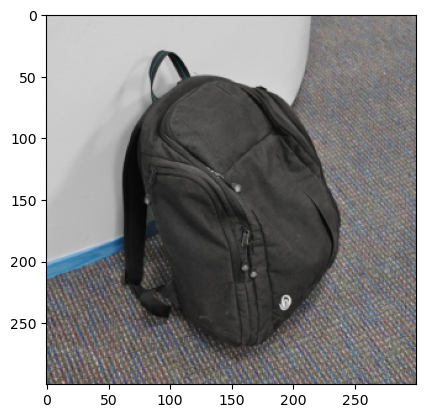

In [28]:
plt.imshow(test_data['images'][0])

In [31]:
accuracy_score(y_test_pred, test_data['labels'])

0.49336283185840707